# **Import Library**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Memuat Dataset**

In [2]:
transaksi = pd.read_csv("https://raw.githubusercontent.com/yovelakalista23/BMLP/refs/heads/main/dataset_inisiasi.csv")
transaksi.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# **EDA (Exploratory Data Analysis)**

### **Memahami Struktur Data**

In [3]:
transaksi.shape

(2512, 16)

- Dataset terdiri dari 2512 baris dan 16 kolom

In [4]:
transaksi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

Jenis data pada dataset ini terdiri dari 2, yaitu:

- Data Kategorikal (11 Kolom)= TransactionID, AccountID, TransactionDate, TransactionType, Location, DeviceID, IP Address, MerchantID, Channel, CustomerOccupation, PreviousTransactionDate

- Data Numerik (5 Kolom)= TransactionAmount, CustomerAge, TransactionDuration, LoginAttempts, AccountBalance

In [5]:
transaksi.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


In [6]:
transaksi.isna().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


Tidak terdapat Missing Values

In [7]:
print("Number of Duplicates: ", transaksi.duplicated().sum())

Number of Duplicates:  0


Tidak terdapat Duplikat Data

## **Analisis Distribusi dan Korelasi**

In [8]:
transaksi[['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']].describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


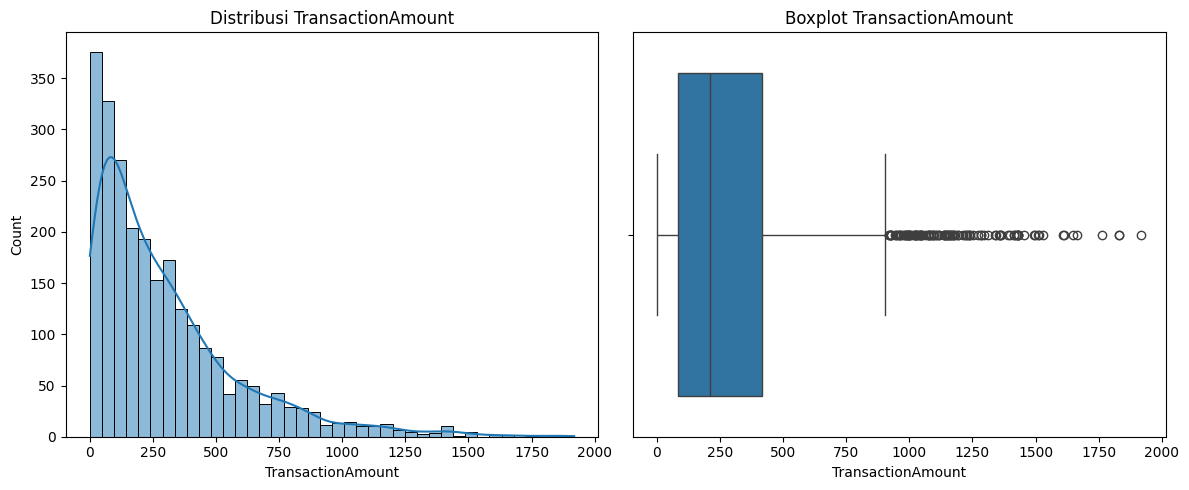

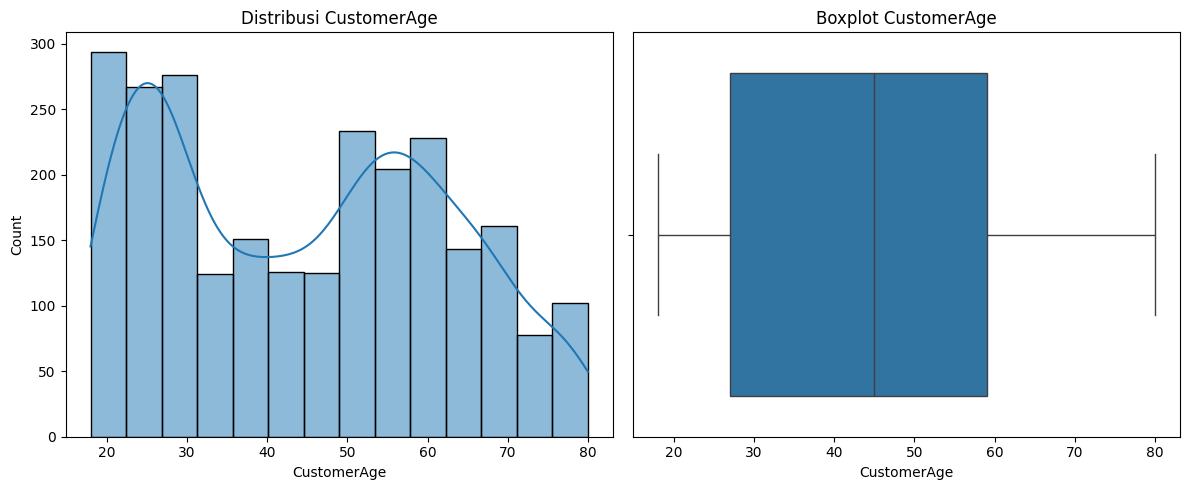

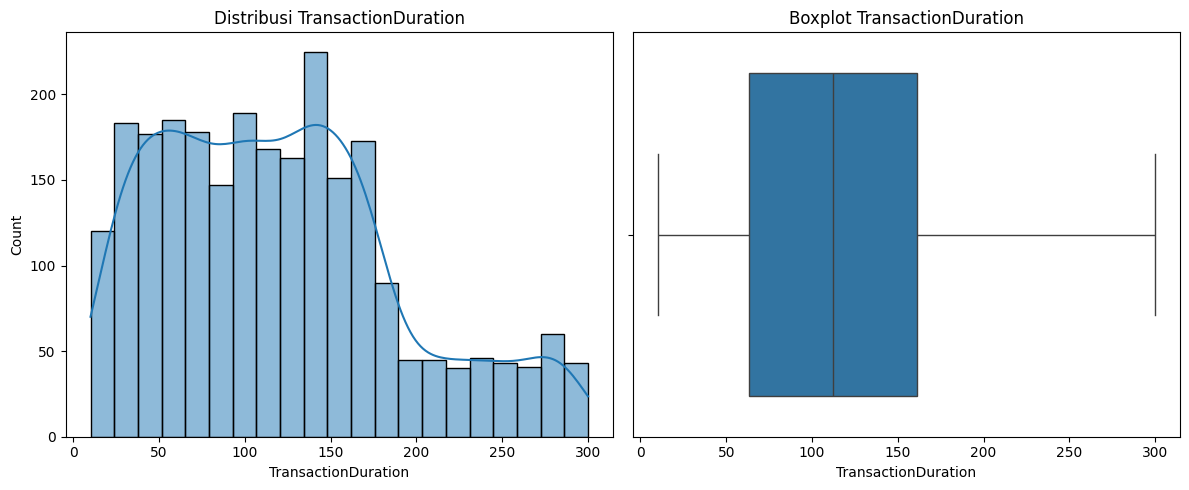

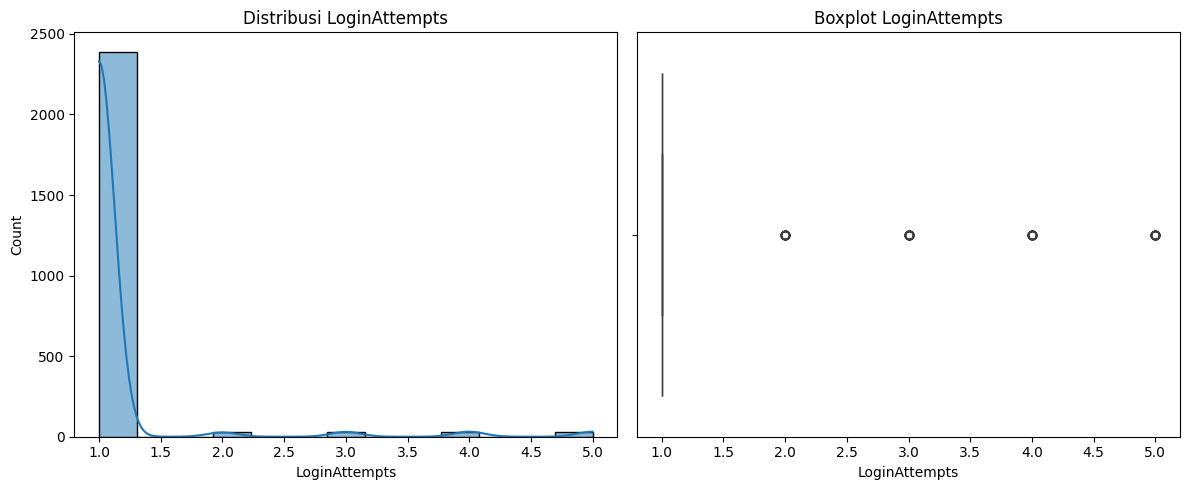

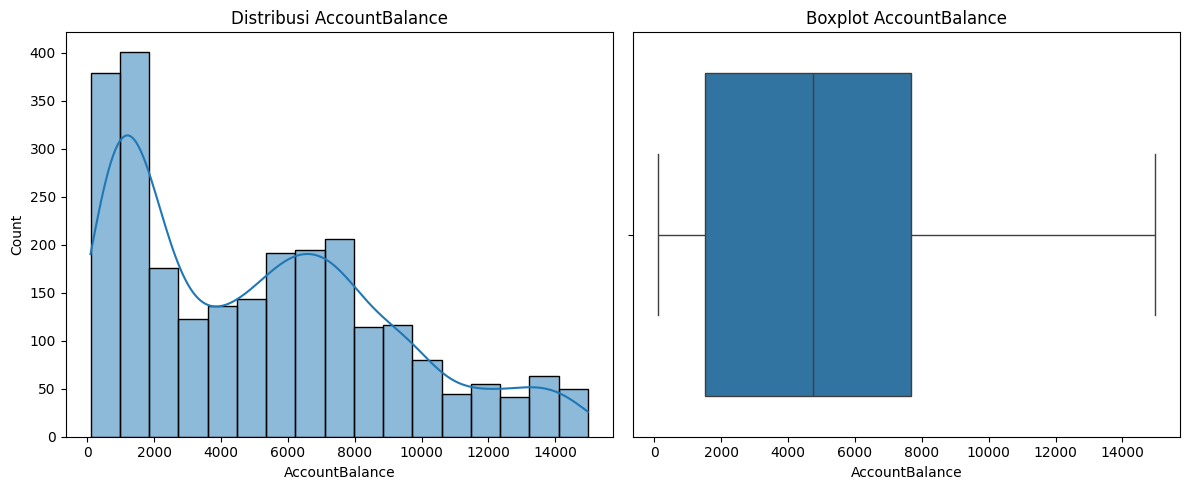

In [9]:
fitur_numerik = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

for fitur in fitur_numerik:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(transaksi[fitur], kde=True)
    plt.title(f'Distribusi {fitur}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=transaksi[fitur])
    plt.title(f'Boxplot {fitur}')

    plt.tight_layout()
    plt.show()

### **Analisis distribusi data numerik**

- TransactionAmount : Distribusinya bersifat right-skewed (miring ke kanan), lebih banyak transaksi kecil daripada transaksi besar.

- CustomerAge : Usia customer merata dengan puncak distribusi di usia 20-30 tahun dan 50-60 tahun

- TransactionDuration : Menunjukkan durasi transaksi lebih sering sekitar 100 detik dan maksimal 300 detik, bersifat right-skewed

- LoginAttempts : Sebagian besar customer hanya melakukan login sebanyak 1 kali

- AccountBalance : Sebagian besar customer memiliki saldo hanya sekitar 0-8000, sedikit bersifat right-skewed

right-skewed: banyak angka numpuk di angka kecil, tetapi ada sedikit data yang nilainya jauh lebih besar.

**Kesimpulannya** dataset ini menunjukkan distribusi yang tidak simetris. Kolom TransactionAmount, TransactionDuration, dan AccountBalance memiliki distribusi yang right-skewed, yang berarti sebagian besar transaksi berada pada nilai yang relatif kecil, namun terdapat beberapa nilai yang jauh lebih tinggi dari rata-rata (outlier). Hal ini bisa mengindikasikan adanya transaksi tidak biasa atau pengguna dengan saldo yang sangat besar.

Kemudian, kolom CustomerAge memiliki distribusi yang relatif simetris, menunjukkan penyebaran usia pelanggan yang merata. Sedangkan LoginAttempts cenderung left-skewed, karena sebagian besar pelanggan hanya melakukan satu kali percobaan login, meskipun ada sedikit yang mencoba lebih dari sekali.



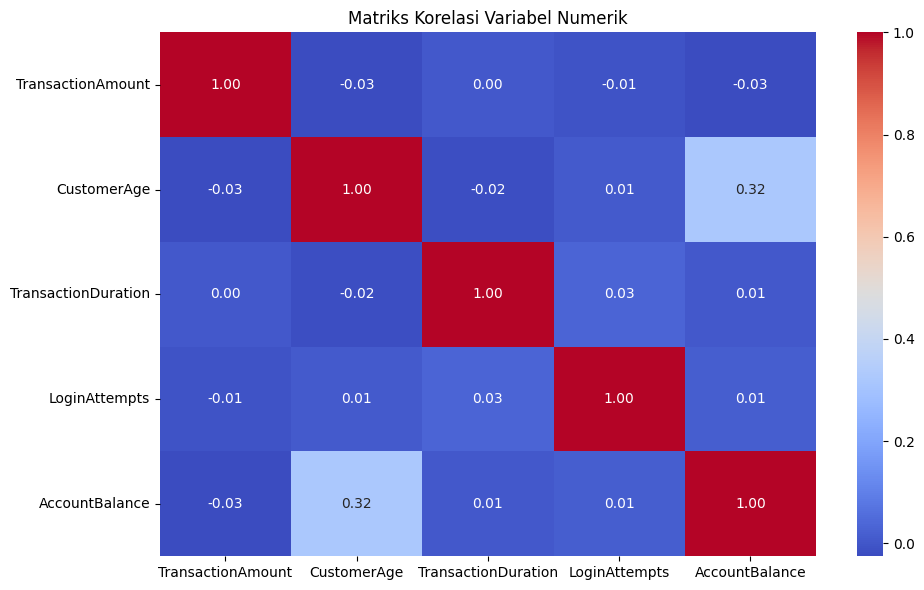

In [10]:
# Hitung korelasi
korelasi = transaksi[fitur_numerik].corr()

# Plot heatmap korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(korelasi, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriks Korelasi Variabel Numerik")
plt.tight_layout()
plt.show()

- Hanya CustomerAge dan AccountBalance yang menunjukkan hubungan berarti (0.32).

**Kesimpulannya** Korelasi yang paling menonjol ditemukan antara CustomerAge dan AccountBalance dengan nilai korelasi sebesar 0.32, mengindikasikan hubungan positif lemah: semakin tua usia pelanggan, cenderung semakin besar saldo akunnya. Tidak ditemukan korelasi kuat lainnya di antara variabel numerik.

### **Visualisasi Data**

<Figure size 1800x500 with 0 Axes>

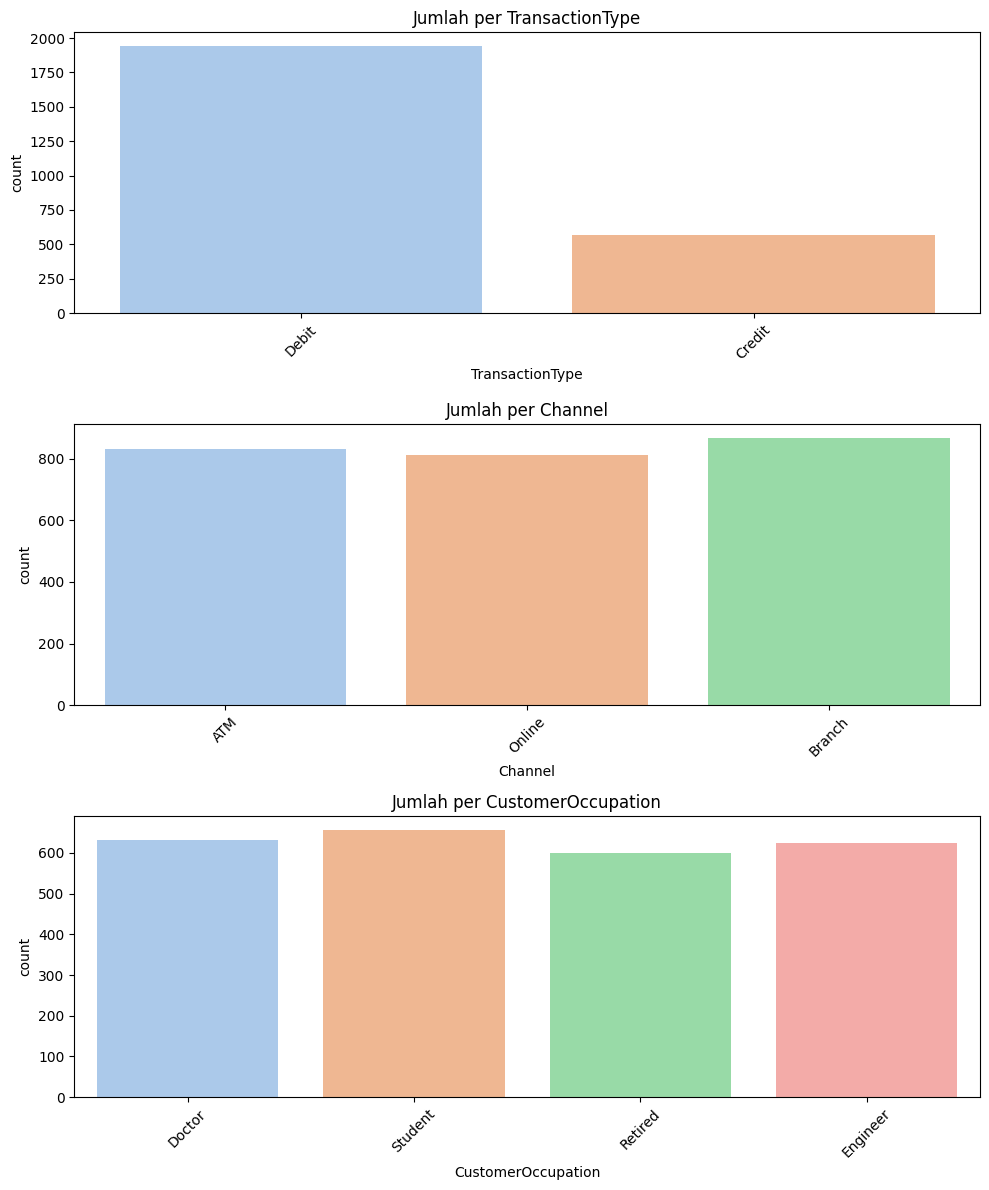

In [11]:
# List variabel kategorikal (contoh)
fitur_kategori = ['TransactionType', 'Channel', 'CustomerOccupation']

# Plot bar chart
plt.figure(figsize=(18, 5))
plt.figure(figsize=(10, len(fitur_kategori) * 4))
for i, col in enumerate(fitur_kategori):
    plt.subplot(len(fitur_kategori), 1, i+1)
    sns.countplot(data=transaksi, x=col, hue=col, palette='pastel', legend=False)
    plt.title(f'Jumlah per {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Analisis Visualisasi Data Kategorikal:

Dari total 11 kolom kategorikal, hanya 3 kolom utama yang divisualisasikan, yaitu:

- TransactionType

- Channel

- CustomerOccupation

Alasan pemilihan 3 kolom ini:

- Kolom-kolom tersebut lebih relevan dalam memberikan gambaran pola transaksi nasabah.

- Sementara kolom lain seperti TransactionID, AccountID, DeviceID, IP Address, MerchantID, Location, PreviousTransactionDate, dll lebih bersifat unik untuk setiap transaksi (ID atau lokasi spesifik) sehingga kurang bermakna untuk analisis distribusi umum.

Penjelasan hasil grafik:

- TransactionType: Mayoritas transaksi adalah Debit, jauh lebih banyak dibandingkan Credit.

- Channel: Penggunaan channel ATM, Online, dan Branch hampir seimbang, dengan sedikit dominasi penggunaan Branch.

- CustomerOccupation: Sebaran profesi pelanggan cukup merata antara Student, Doctor, Retired, dan Engineer, dengan Student sedikit lebih dominan.

# **Data Preprocessing**

Tahapan-tahapan data preprocessing meliputi:

1. Deteksi dan penanganan Outlier

2. Normalisasi

3. Binning


### **Deteksi dan Penanganan Outlier**

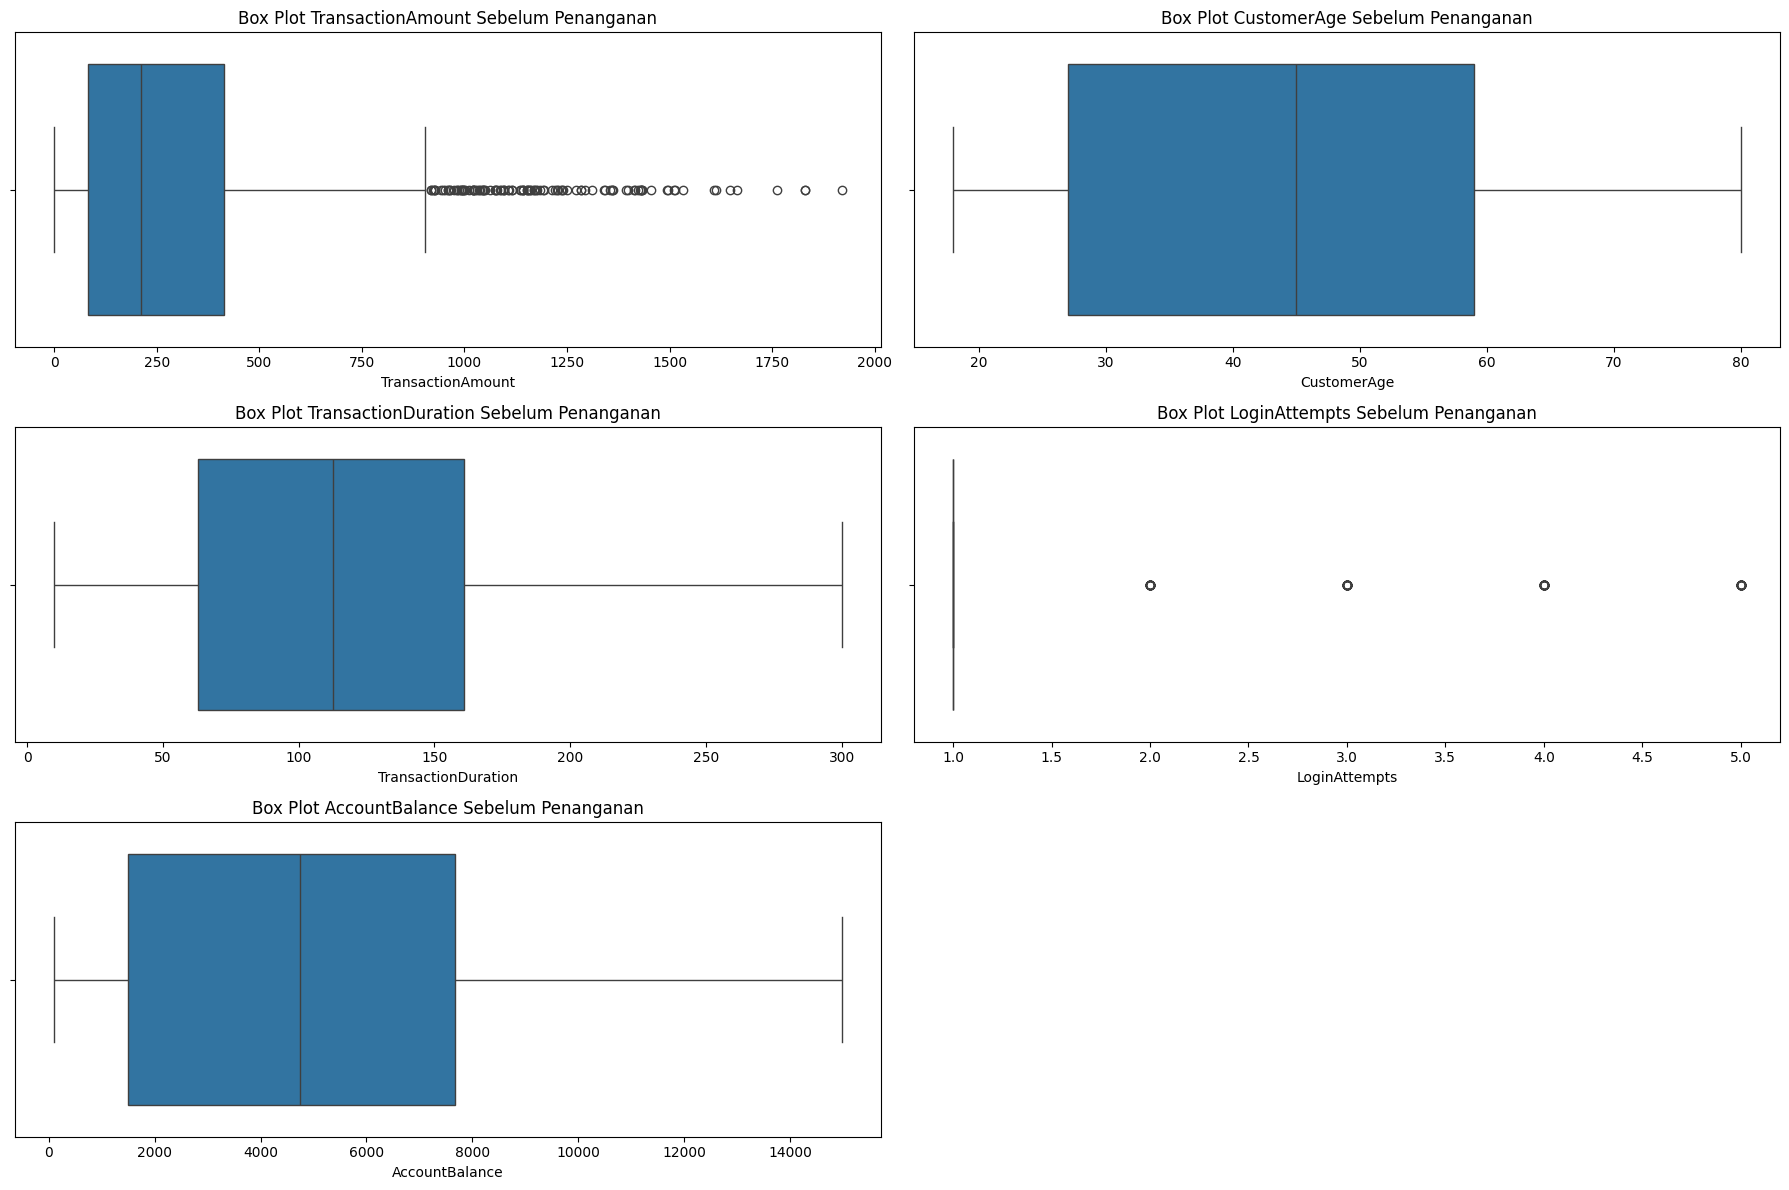

In [12]:
# Box Plot sebelum penanganan outliers
plt.figure(figsize=(18, 12))
for i, column in enumerate(fitur_numerik, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=transaksi[column])
    plt.title(f'Box Plot {column} Sebelum Penanganan')
plt.tight_layout()
plt.show()

In [13]:
# Menangani Outlier dengan memberikan nilai batas terdekat
for feature in fitur_numerik:
    Q1 = transaksi[feature].quantile(0.25)
    Q3 = transaksi[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    transaksi[feature] = transaksi[feature].apply(
        lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x
    )

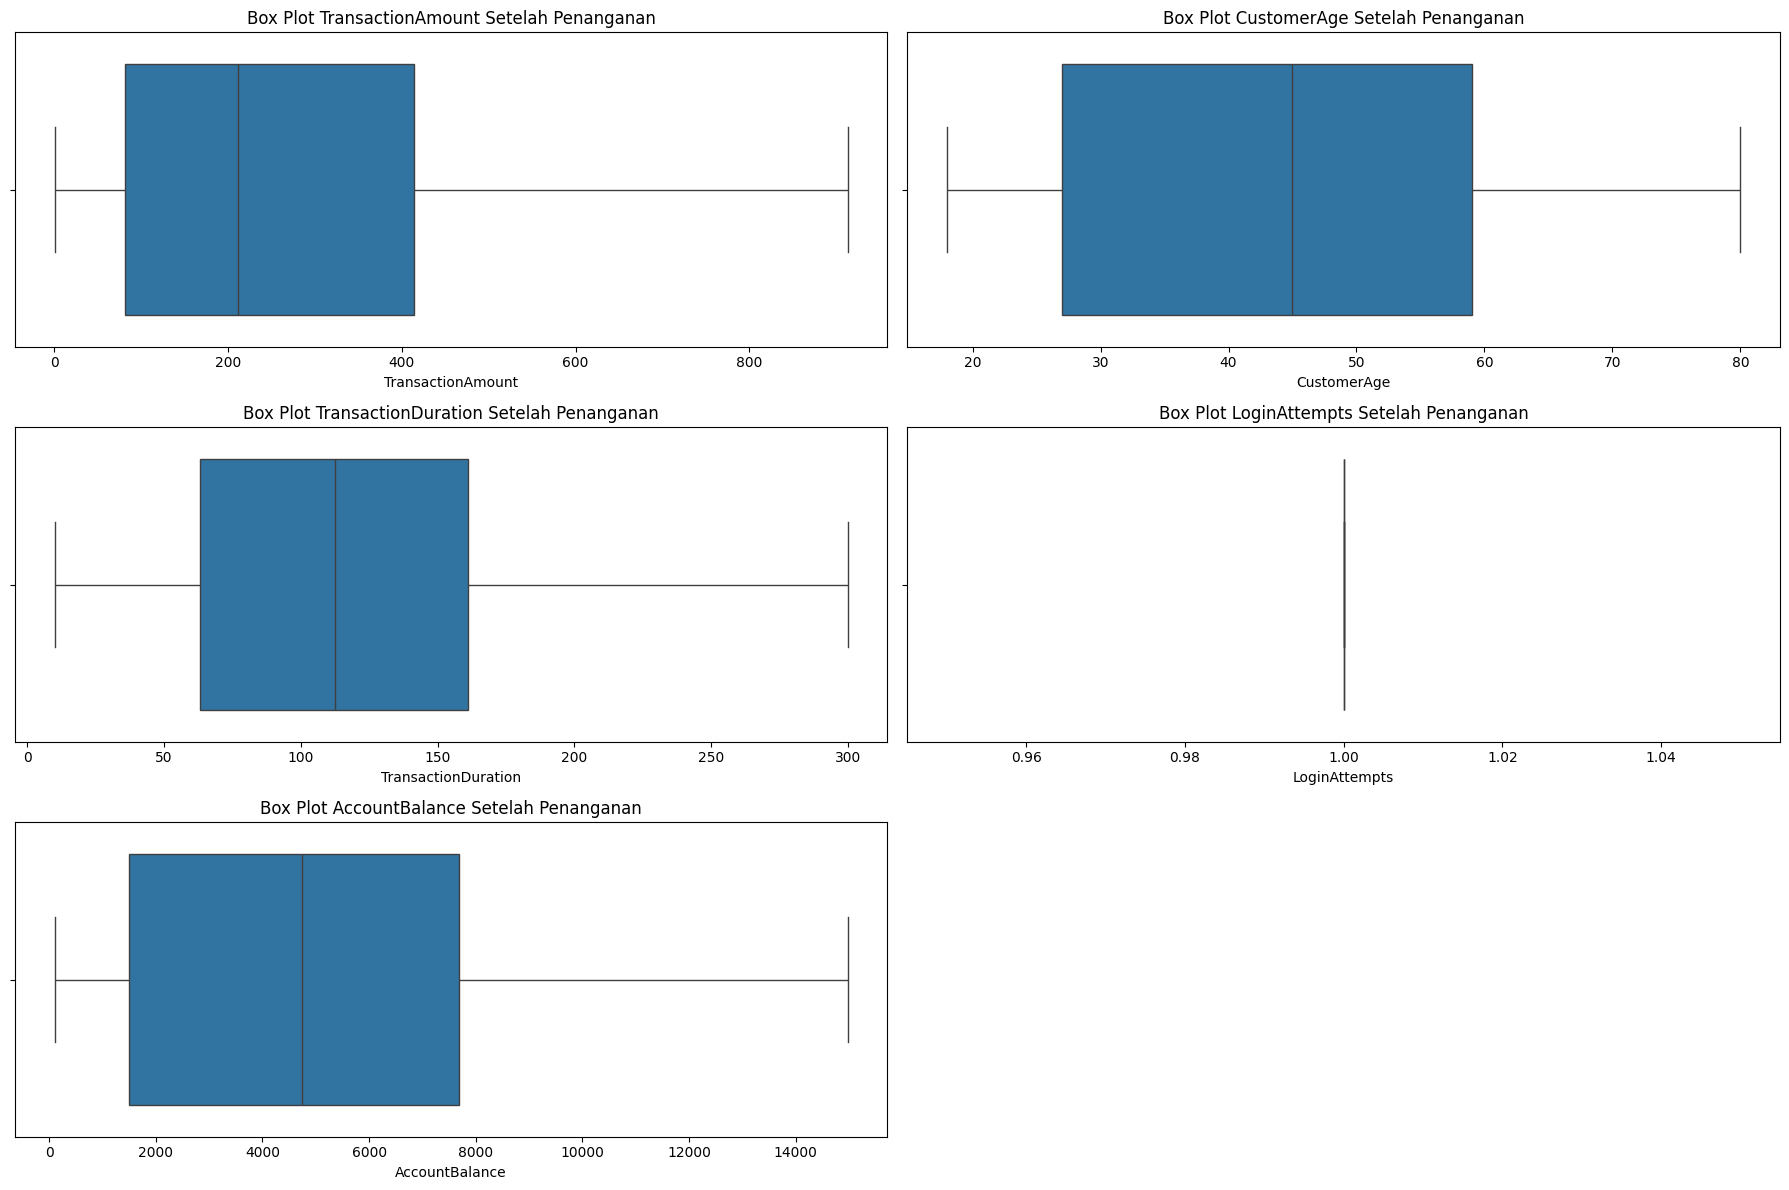

In [14]:
# Hasil box plot setelah dilakukan penanganan Outlier
plt.figure(figsize=(18, 12))
for i, column in enumerate(fitur_numerik, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=transaksi[column])
    plt.title(f'Box Plot {column} Setelah Penanganan')
plt.tight_layout()
plt.show()

Setelah melakukan penanganan Outlier, dataset menjadi lebih bersih dan sesuai

## **Normalisasi**

Menormalisasikan pada data numerik yaitu TransactionAmount, CustomerAge, TransactionDuration, LoginAttempts, dan AccountBalance menggunakan StandardScaler

In [15]:
from sklearn.preprocessing import StandardScaler

# Pilih kolom numerik untuk dinormalisasi
numerical_columns = ['TransactionAmount', 'CustomerAge']

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Terapkan normalisasi pada kolom numerik
transaksi[numerical_columns] = scaler.fit_transform(transaksi[numerical_columns])

# Cek hasilnya
print(transaksi.head())


  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128          -1.074361  2023-04-11 16:29:14   
1      TX000002   AC00455           0.362645  2023-06-27 16:44:19   
2      TX000003   AC00019          -0.629153  2023-07-10 18:16:08   
3      TX000004   AC00070          -0.398176  2023-05-05 16:32:11   
4      TX000005   AC00411          -1.076900  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0     1.423718             Doctor                   81 

In [16]:
transaksi.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,-1.074361,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,1.423718,Doctor,81,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,0.362645,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,1.311287,Doctor,141,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,-0.629153,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,-1.443277,Student,56,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,-0.398176,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,-1.049768,Student,25,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,-1.076900,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,-1.049768,Student,198,1.0,7429.40,2024-11-04 08:06:39


### **Binning (Pengelompokkan Data)**

In [20]:
transaksi_binned = transaksi.copy()

# Binning untuk TransactionAmount
bins_amount = [-float('inf'), -0.5, 0.5, float('inf')]  # Kecil, Sedang, Besar
labels_amount = ['Kecil', 'Sedang', 'Besar']
transaksi_binned['AmountGroup'] = pd.cut(transaksi_binned['TransactionAmount'], bins=bins_amount, labels=labels_amount)

# Binning untuk CustomerAge
bins_age = [-float('inf'), 0, 1, float('inf')]  # Muda, Dewasa, Tua
labels_age = ['Muda', 'Dewasa', 'Tua']
transaksi_binned['AgeGroup'] = pd.cut(transaksi_binned['CustomerAge'], bins=bins_age, labels=labels_age)


# Menampilkan hasil binning
transaksi_binned[['TransactionAmount', 'AmountGroup', 'CustomerAge', 'AgeGroup']].head()

,TransactionAmount,AmountGroup,CustomerAge,AgeGroup
0,-1.074361,Kecil,1.423718,Tua
1,0.362645,Sedang,1.311287,Tua
2,-0.629153,Kecil,-1.443277,Muda
3,-0.398176,Sedang,-1.049768,Muda
4,-1.076900,Kecil,-1.049768,Muda


In [21]:
print(transaksi_binned[['TransactionAmount', 'CustomerAge']].describe())


       TransactionAmount   CustomerAge
count       2.512000e+03  2.512000e+03
mean        8.344351e-17  9.900078e-18
std         1.000199e+00  1.000199e+00
min        -1.129238e+00 -1.499493e+00
25%        -8.053511e-01 -9.935526e-01
50%        -2.924692e-01  1.832826e-02
75%         5.145692e-01  8.053467e-01
max         2.494450e+00  1.985874e+00


In [22]:
transaksi_binned.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,AmountGroup,AgeGroup
0,TX000001,AC00128,-1.074361,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,1.423718,Doctor,81,1.0,5112.21,2024-11-04 08:08:08,Kecil,Tua
1,TX000002,AC00455,0.362645,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,1.311287,Doctor,141,1.0,13758.91,2024-11-04 08:09:35,Sedang,Tua
2,TX000003,AC00019,-0.629153,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,-1.443277,Student,56,1.0,1122.35,2024-11-04 08:07:04,Kecil,Muda
3,TX000004,AC00070,-0.398176,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,-1.049768,Student,25,1.0,8569.06,2024-11-04 08:09:06,Sedang,Muda
4,TX000005,AC00411,-1.076900,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,-1.049768,Student,198,1.0,7429.40,2024-11-04 08:06:39,Kecil,Muda


# **Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

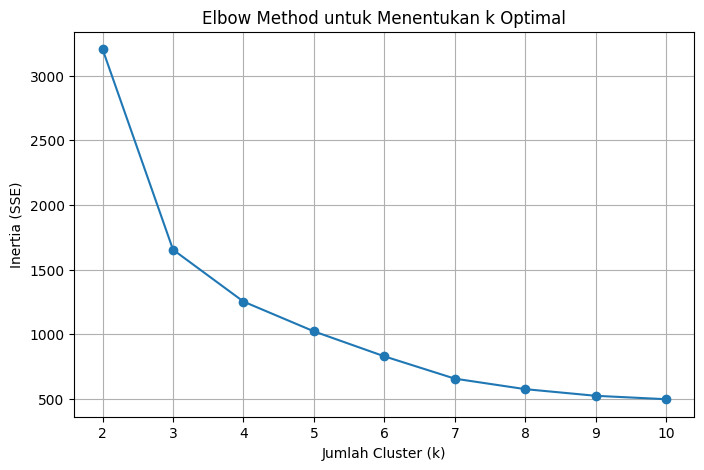

In [23]:
from sklearn.cluster import KMeans

# Memilih fitur
features = transaksi[['TransactionAmount', 'CustomerAge']]

# Cek Inertia untuk berbagai nilai k
inertia = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method untuk Menentukan k Optimal')
plt.grid(True)
plt.show()



Pada tahap ini, dilakukan pembuatan model clustering awal menggunakan algoritma KMeans. Model ini bertujuan untuk melihat bagaimana data dapat dikelompokkan berdasarkan fitur-fitur yang tersedia, tanpa menentukan jumlah cluster optimal terlebih dahulu.

Model ini digunakan sebagai percobaan awal untuk melihat hasil pengelompokan data, sebelum dilakukan evaluasi untuk menentukan jumlah cluster yang paling optimal.

In [24]:
# 2. Setelah lihat grafik dan pilih k (misal k=3)
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
clusters = kmeans.fit_predict(features)

# 3. Tambahkan hasil cluster ke dataset
transaksi['Cluster'] = clusters

# 4. Cek hasil
print(transaksi.head())

  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128          -1.074361  2023-04-11 16:29:14   
1      TX000002   AC00455           0.362645  2023-06-27 16:44:19   
2      TX000003   AC00019          -0.629153  2023-07-10 18:16:08   
3      TX000004   AC00070          -0.398176  2023-05-05 16:32:11   
4      TX000005   AC00411          -1.076900  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0     1.423718             Doctor                   81 

In [25]:
from sklearn.metrics import silhouette_score

# Evaluasi Clustering dengan Silhouette Score
silhouette_avg = silhouette_score(features, clusters)
print(f"Silhouette Score: {silhouette_avg:.4f}")
# Melihat hasil clustering
print(f'Distribusi Cluster:\n{pd.Series(clusters).value_counts().sort_index()}')


Silhouette Score: 0.4622
Distribusi Cluster:
0    1055
1     476
2     981
Name: count, dtype: int64


### **b. Evaluasi Model Clustering**

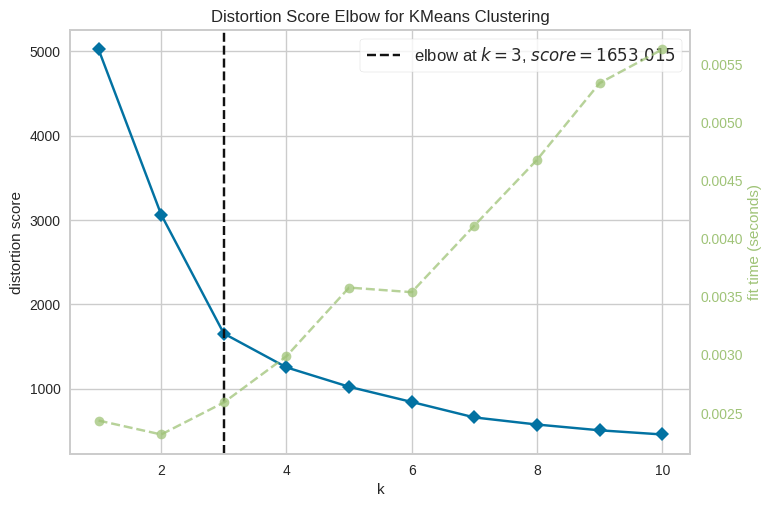

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
from yellowbrick.cluster import KElbowVisualizer

# Metode Elbow untuk menentukan k optimal
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1, 11))
visualizer.fit(features)
visualizer.show()

Silhouette Score untuk 2 cluster: 0.3970
Silhouette Score untuk 3 cluster: 0.4622
Silhouette Score untuk 4 cluster: 0.4522
Silhouette Score untuk 5 cluster: 0.4275
Silhouette Score untuk 6 cluster: 0.3898
Silhouette Score untuk 7 cluster: 0.4079
Silhouette Score untuk 8 cluster: 0.4012
Silhouette Score untuk 9 cluster: 0.3931
Silhouette Score untuk 10 cluster: 0.3822


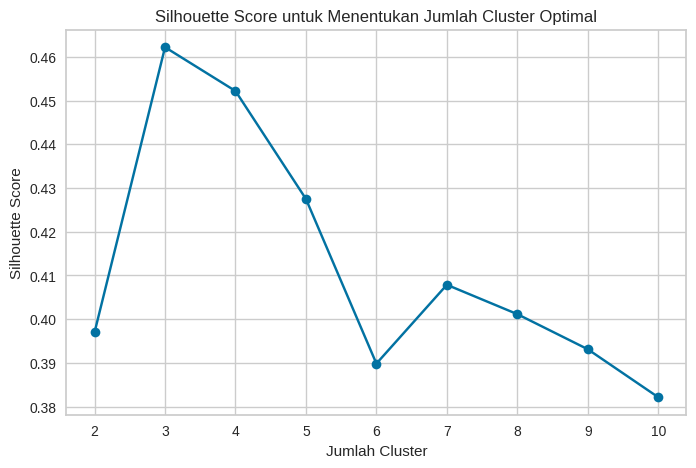

In [27]:
# Menghitung Silhouette Score untuk setiap jumlah cluster dari 2 hingga 10
silhouette_scores = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=5)
    labels = kmeans.fit_predict(features)
    score = silhouette_score(features, labels)
    silhouette_scores.append(score)
    print(f'Silhouette Score untuk {k} cluster: {score:.4f}')

# Visualisasi Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Menentukan Jumlah Cluster Optimal')
plt.show()

Setelah model clustering awal dibuat, dilakukan evaluasi untuk menentukan jumlah cluster yang optimal.

Dua metode digunakan dalam evaluasi ini:

Elbow Method: Untuk melihat titik "tekukan" dari grafik inertia, yang menunjukkan jumlah cluster yang baik.

Silhouette Score: Untuk mengukur seberapa baik setiap data point berada di dalam clusternya masing-masing (semakin mendekati 1 semakin baik).

Hasil evaluasi ini akan digunakan untuk membangun model clustering yang lebih optimal.

### **Visualisasi Hasil Clustering**

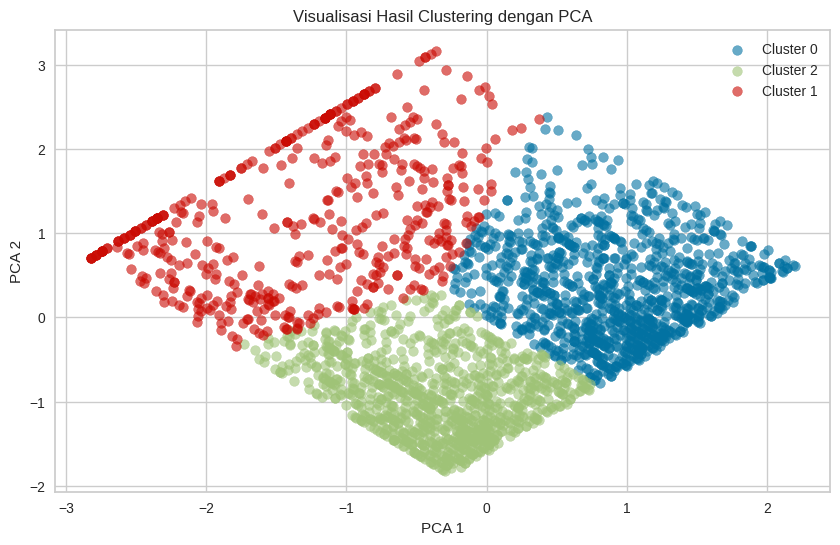

In [28]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Drop kolom non-numerik untuk visualisasi (seperti 'AgeGroup', dst)
X_numeric = transaksi.copy()

# Lakukan PCA untuk mereduksi ke 2 dimensi
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features)

# Tambahkan hasil PCA ke DataFrame
transaksi['PCA1'] = pca_result[:, 0]
transaksi['PCA2'] = pca_result[:, 1]

# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
for cluster in transaksi['Cluster'].unique():
    subset = transaksi[transaksi['Cluster'] == cluster]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=f'Cluster {cluster}', alpha=0.6)

plt.title('Visualisasi Hasil Clustering dengan PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.grid(True)
plt.show()


In [29]:
from sklearn.cluster import KMeans

# Buat model KMeans baru dengan jumlah cluster optimal
kmeans_model = KMeans(n_clusters=3, random_state=42)

# Fit model ke data kamu
kmeans_model.fit(features)


KMeans(n_clusters=3, random_state=42)

### **e. Analisis dan Interpretasi Hasil Cluster**


**1. Tambahkan label cluster ke Dataframe**

In [30]:
transaksi['Cluster'] = kmeans_model.labels_

**2. Inverse data jika melakukan Standarisasi/Normalisasi**

In [31]:
# Menggunakan inverse_transform untuk membalikkan hasil normalisasi
transaksi[numerical_columns] = scaler.inverse_transform(transaksi[numerical_columns])

# Cek hasil setelah inverse
transaksi.head()


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Cluster,PCA1,PCA2
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81,1.0,5112.21,2024-11-04 08:08:08,0,1.766409,0.247033
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141,1.0,13758.91,2024-11-04 08:09:35,0,0.670791,1.183649
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56,1.0,1122.35,2024-11-04 08:07:04,2,-0.575673,-1.465429
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25,1.0,8569.06,2024-11-04 08:09:06,2,-0.460745,-1.023851
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26.0,Student,198,1.0,7429.40,2024-11-04 08:06:39,2,0.019185,-1.503782


In [33]:
transaksi.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Cluster,PCA1,PCA2
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81,1.0,5112.21,2024-11-04 08:08:08,0,1.766409,0.247033
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141,1.0,13758.91,2024-11-04 08:09:35,0,0.670791,1.183649
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56,1.0,1122.35,2024-11-04 08:07:04,2,-0.575673,-1.465429
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25,1.0,8569.06,2024-11-04 08:09:06,2,-0.460745,-1.023851
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26.0,Student,198,1.0,7429.40,2024-11-04 08:06:39,2,0.019185,-1.503782


In [34]:
# Tentukan fitur numerik dan kategorikal untuk analisis
feature_names_num = ['TransactionAmount', 'CustomerAge']
feature_names_cat = ['TransactionType', 'Channel', 'CustomerOccupation']

# Fungsi analisis karakteristik setiap cluster
def analyze_clusters(df, labels, k_optimal, feature_names_num, feature_names_cat):
    print('Analisis Karakteristik Setiap Cluster:')

    for cluster_id in range(k_optimal):
        cluster_data = df[df['Cluster'] == cluster_id]
        print(f'\nCluster {cluster_id + 1} (jumlah data: {len(cluster_data)}):')

        # Analisis fitur numerik
        for feature in feature_names_num:
            min_val = cluster_data[feature].min()
            max_val = cluster_data[feature].max()
            mean_val = cluster_data[feature].mean()
            print(f" - {feature}: min = {min_val:.2f}, max = {max_val:.2f}, mean = {mean_val:.2f}")

        # Analisis fitur kategorikal
        for feature in feature_names_cat:
            if feature in cluster_data.columns:
                mode_val = cluster_data[feature].mode()[0]
                print(f" - {feature}: mode = {mode_val}")
            else:
                print(f" - {feature}: kolom tidak ditemukan (mungkin belum inverse dari one-hot encoding)")

# Panggil fungsi analisis karakteristik
analyze_clusters(transaksi, transaksi['Cluster'], k_optimal, feature_names_num, feature_names_cat)


Analisis Karakteristik Setiap Cluster:

Cluster 1 (jumlah data: 1055):
 - TransactionAmount: min = 0.84, max = 632.69, mean = 185.28
 - CustomerAge: min = 45.00, max = 80.00, mean = 60.47
 - TransactionType: mode = Debit
 - Channel: mode = ATM
 - CustomerOccupation: mode = Retired

Cluster 2 (jumlah data: 476):
 - TransactionAmount: min = 418.02, max = 913.49, mean = 717.79
 - CustomerAge: min = 18.00, max = 80.00, mean = 42.80
 - TransactionType: mode = Debit
 - Channel: mode = ATM
 - CustomerOccupation: mode = Student

Cluster 3 (jumlah data: 981):
 - TransactionAmount: min = 0.26, max = 537.71, mean = 181.85
 - CustomerAge: min = 18.00, max = 44.00, mean = 28.60
 - TransactionType: mode = Debit
 - Channel: mode = Branch
 - CustomerOccupation: mode = Student


Berdasarkan data yang diberikan, berikut adalah analisis karakteristik setiap cluster:

* Cluster 1 (Jumlah data: 1055)

TransactionAmount: Nilai transaksi berkisar antara 0.84 hingga 632.69, dengan rata-rata 185.28. Ini menunjukkan bahwa transaksi di cluster ini relatif kecil.

CustomerAge: Rentang umur berada di antara 45 hingga 80 tahun, dengan rata-rata 60.47. Cluster ini didominasi oleh pelanggan yang lebih tua.

TransactionType: Jenis transaksi yang paling umum adalah Debit.

Channel: Sebagian besar transaksi dilakukan melalui ATM.

CustomerOccupation: Mayoritas pelanggan memiliki pekerjaan sebagai Retired (pensiunan).

Kesimpulan Cluster 1: Cluster ini mewakili kelompok pelanggan yang lebih tua dan lebih cenderung melakukan transaksi debit dengan jumlah yang relatif kecil melalui ATM.

* Cluster 2 (Jumlah data: 476)

TransactionAmount: Nilai transaksi berkisar antara 418.02 hingga 913.49, dengan rata-rata 717.79. Ini menunjukkan bahwa transaksi di cluster ini memiliki nilai menengah.

CustomerAge: Rentang umur berada di antara 18 hingga 80 tahun, dengan rata-rata 42.80. Cluster ini terdiri dari pelanggan dengan rentang usia yang lebih luas, termasuk orang dewasa muda hingga menengah.

TransactionType: Jenis transaksi yang paling umum adalah Debit.

Channel: Sebagian besar transaksi dilakukan melalui ATM.

CustomerOccupation: Mayoritas pelanggan adalah Student (mahasiswa).

Kesimpulan Cluster 2: Cluster ini mewakili kelompok pelanggan muda dan dewasa yang sering menggunakan ATM untuk melakukan transaksi debit dengan nilai transaksi yang lebih tinggi dibandingkan dengan Cluster 1.

* Cluster 3 (Jumlah data: 981)

TransactionAmount: Nilai transaksi berkisar antara 0.26 hingga 537.71, dengan rata-rata 181.85. Transaksi di cluster ini cenderung kecil.

CustomerAge: Rentang umur berada di antara 18 hingga 44 tahun, dengan rata-rata 28.60. Cluster ini didominasi oleh pelanggan yang lebih muda.

TransactionType: Jenis transaksi yang paling umum adalah Debit.

Channel: Sebagian besar transaksi dilakukan melalui Branch (cabang).

CustomerOccupation: Mayoritas pelanggan adalah Student (mahasiswa).

Kesimpulan Cluster 3: Cluster ini mewakili kelompok mahasiswa yang lebih muda dengan transaksi kecil dan lebih banyak melakukan transaksi melalui cabang bank dibandingkan dengan ATM.

**Analisis Umum**

Cluster 1 didominasi oleh pelanggan yang lebih tua dengan transaksi kecil dan lebih cenderung melakukan transaksi melalui ATM.

Cluster 2 terdiri dari pelanggan dengan rentang usia yang lebih luas, mayoritas adalah mahasiswa, dan memiliki transaksi menengah yang dilakukan melalui ATM.

Cluster 3 memiliki pelanggan yang lebih muda, dengan transaksi kecil dan lebih cenderung melakukan transaksi di cabang bank.

# **Mengeksport Data**

In [36]:
# Export hasil clustering
transaksi.to_csv('dataset_clustering.csv', index=False)